In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
data = pd.read_csv('C:/Users/shash/Desktop/Business Practicum/POC Data/Data/New/SALES_DATA.csv')

In [44]:
data['COST'].dtype

dtype('O')

In [43]:
def ABC_segmentation(perc):
    '''
    Creates the 3 classes A,  B, and C based 
    on quantity percentages (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [5]:
# take a subset of the data, we need to use the price and the quantity of each item
data_sub = data[["StockCode","UnitPrice","Quantity Shipped"]]

# create the column of the additive cost per SKU
data_sub["AddCost"] = data_sub["UnitPrice"] * data_sub["Quantity Shipped"] 

# order by cumulative cost
data_sub = data_sub.sort_values(by=['AddCost'], ascending=False)

# create the column of the running CumCost of the cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()

# create the column of the total sum
data_sub['TotSum'] = data_sub['AddCost'].sum()

# create the column of the running percentage
data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']

# create the column of the class
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

C:\Users\Yen.LAPTOP-BPKQVHNJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
data_sub.head()

,StockCode,UnitPrice,Quantity Shipped,AddCost,RunCumCost,TotSum,RunPerc,Class
147733,23166,1.130,664224.2500,750573.402500,7.505734e+05,4.586340e+07,0.016365,A
566272,22655,80.001,8359.2000,668744.359200,1.419318e+06,4.586340e+07,0.030947,A
566305,22502,188.186,2429.3925,457177.657005,1.876495e+06,4.586340e+07,0.040915,A
566241,22656,52.625,7776.0000,409212.000000,2.285707e+06,4.586340e+07,0.049837,A
493395,21430,1.394,270278.4780,376768.198332,2.662476e+06,4.586340e+07,0.058052,A


In [7]:
# total SKUs for each class
data_sub.Class.value_counts()

C    500773
B     58376
A      7160
Name: Class, dtype: int64

In [8]:
# total cost per class
print ('Cost of Class A :', data_sub[data_sub.Class == 'A']['AddCost'].sum())
print ('Cost of Class B :', data_sub[data_sub.Class == 'B']['AddCost'].sum())
print ('Cost of Class C :', data_sub[data_sub.Class == 'C']['AddCost'].sum())

Cost of Class A : 27517745.277261462
Cost of Class B : 11466099.419030296
Cost of Class C : 6879557.093346432


In [9]:
# percent of total cost per class
print ('Percent of Cost of Class A :', data_sub[data_sub.Class == 'A']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Percent of Cost of Class B :', data_sub[data_sub.Class == 'B']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Percent of Cost of Class C :', data_sub[data_sub.Class == 'C']['AddCost'].sum()/data_sub['AddCost'].sum())

Percent of Cost of Class A : 0.599993550488845
Percent of Cost of Class B : 0.2500054285467504
Percent of Cost of Class C : 0.15000102096440465


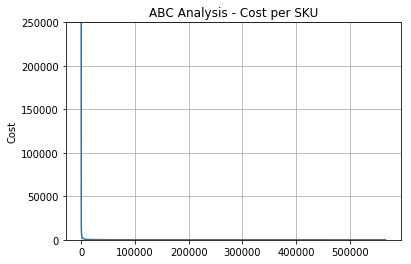

In [10]:
performance = data_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

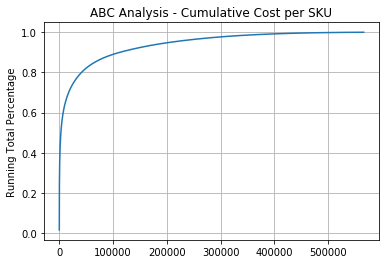

In [11]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()